In [137]:
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.metrics import r2_score

In [138]:
C_kal=np.array([1,
2,
3,
5,
8,
10,
12,
25,
30,
40,
50,
75,
100,
150,
250,
500])
P_kal=np.array([14,
36,
60,
98,
153,
188,
212,
445,
475,
620,
733,
1036,
1230,
1500,
1672,
1458])
Z_kal=np.array([73.76,
211.95,
354.42,
583.6,
911.7,
1179.33,
1279.4,
2724.45,
2871.95,
3840.65,
4451.29,
6509.43,
7567.65,
9065.35,
9847.41,
6721.67,
])
P_ton=np.array([
    [1196,
1506,
1011,
867,
],
    [1357,
1234,
1034,
840,
],
    [1254,
1083,
720,
396,
],
    [28,
20,
5,
-3
],
    [1254,
1083,
720,
386,
],
    [3049,
1782,
990,
539,
]
])
Z_ton=np.array([    
    [8432.72,
7239.81,
3834.5,
3089,
],
    [7030.52,
5661.22,
4194.25,
2885.6
],
    [8105.05,
7385.28,
4894.56,
2723.65
],
    [286,
245.97,
146.43,
63.56,
],
    [8005.58,
7344.46,
4861.16,
2531.45,
],
    [3138.12,
3619.79,
2562.15,
1625.52,
]
])
nazwy=['Schweppes indian tonic water',
       'Carrefour fresh tonic',
       'Kinley yuzu tonic water',
       'Zbyszko bitter rose',
       'Kinley tonic water',
       'Kinley bitter lemon']


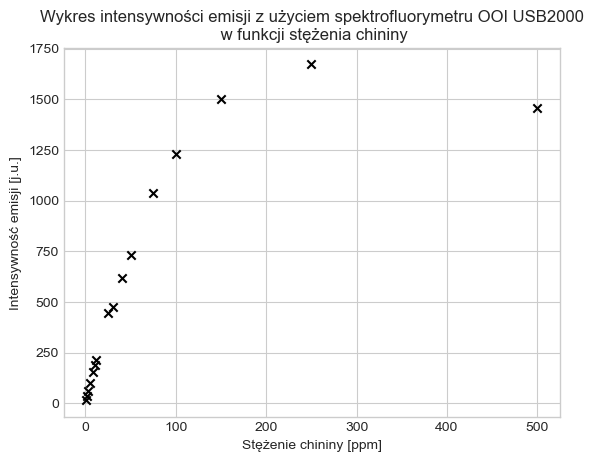

In [139]:
plt.scatter(C_kal,P_kal, marker='x',color='k')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.title('Wykres intensywności emisji z użyciem spektrofluorymetru OOI USB2000\n w funkcji stężenia chininy')
plt.style.use('seaborn-whitegrid')

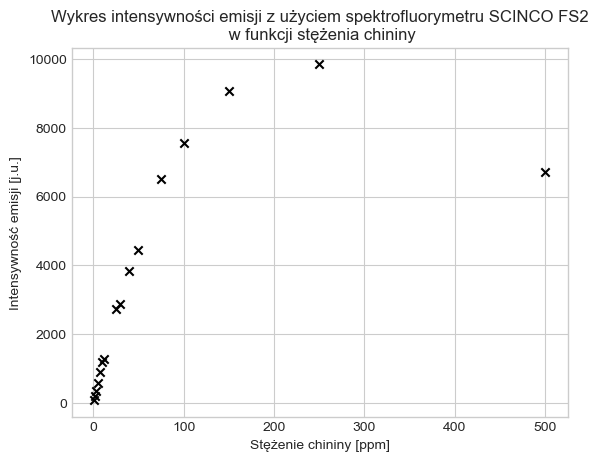

In [140]:
plt.scatter(C_kal,Z_kal, marker='x',color='k')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.title('Wykres intensywności emisji z użyciem spektrofluorymetru SCINCO FS2\n w funkcji stężenia chininy')
plt.style.use('seaborn-whitegrid')

In [141]:
C_kal=C_kal[:,np.newaxis]

In [142]:
wyniki=[]
for i in range(len(C_kal)):
    i=i+1
    wyniki.append(i)
    a, r, _, _ = np.linalg.lstsq(C_kal[:i], Z_kal[:i])
    R2=1 - r / sum((Z_kal - Z_kal.mean())**2)
    wyniki[i-1]=[R2,a]
np.array(wyniki).max(0),wyniki

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_23292\1127750311.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, r, _, _ = np.linalg.lstsq(C_kal[:i], Z_kal[:i])
C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_23292\1127750311.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(wyniki).max(0),wyniki


(array([array([0.99999503]), array([116.08778325])], dtype=object),
 [[array([], dtype=float64), array([73.76])],
  [array([0.99999503]), array([99.532])],
  [array([0.99998836]), array([111.49428571])],
  [array([0.99998689]), array([114.84410256])],
  [array([0.99998678]), array([114.29631068])],
  [array([0.99998276]), array([116.08778325])],
  [array([0.99993749]), array([112.15740634])],
  [array([0.99992398]), array([110.11303498])],
  [array([0.99934498]), array([103.1989156])],
  [array([0.99907836]), array([99.88893145])],
  [array([0.99805085]), array([95.34140489])],
  [array([0.99678261]), array([91.1948021])],
  [array([0.98903595]), array([84.00940501])],
  [array([0.95235015]), array([71.98116924])],
  [array([0.78782675]), array([52.87208946])],
  [array([0.09182965]), array([25.22971623])]])

In [143]:

a, r, _, _ = np.linalg.lstsq(C_kal[:7], P_kal[:7])
R2=1 - r / sum((P_kal - P_kal.mean())**2) 
a, R2

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_23292\1912042817.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, r, _, _ = np.linalg.lstsq(C_kal[:7], P_kal[:7])


(array([18.45533141]), array([0.99995946]))

In [151]:
P_kal[0],P_kal[:8][-1]

(14, 445)

array([[ 1],
       [25]])

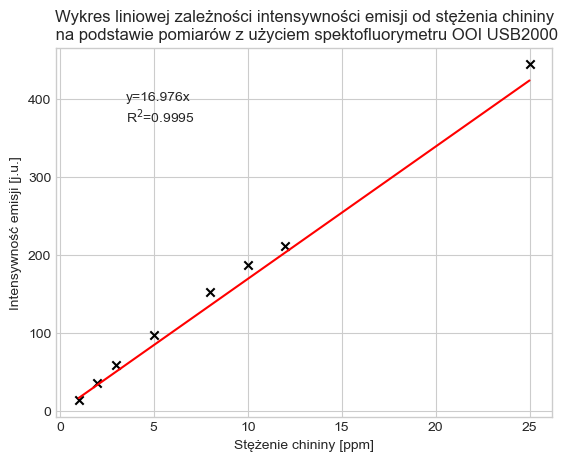

In [150]:
x=np.array([C_kal[:8][0],C_kal[:8][-1]]) #R2=0.99995946
plt.scatter(C_kal[:8],P_kal[:8], marker='x',color='k')
plt.plot(x,16.97596154*x, color='r')
plt.text(3.5,370,'y=16.976x\nR$^2$=0.9995')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.title('Wykres liniowej zależności intensywności emisji od stężenia chininy\n na podstawie pomiarów z użyciem spektofluorymetru OOI USB2000')
plt.style.use('seaborn-whitegrid')

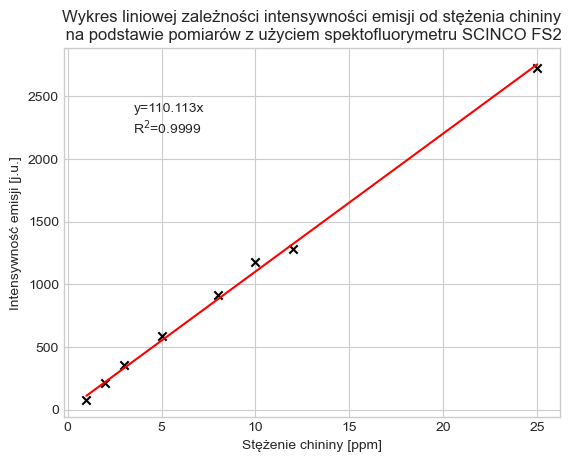

In [145]:
p=8
x=np.array([C_kal[:p][0],C_kal[:p][-1]]) #R2=0.99999503
plt.scatter(C_kal[:p],Z_kal[:p], marker='x',color='k')
plt.plot(x,110.11303498*x, color='r')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.text(3.5,2200,'y=110.113x\nR$^2$=0.9999')
plt.title('Wykres liniowej zależności intensywności emisji od stężenia chininy\n na podstawie pomiarów z użyciem spektofluorymetru SCINCO FS2')
plt.style.use('seaborn-whitegrid')

In [146]:
C_P_pred=P_ton/18.45533141
C=[]
for i in range(4):
    C.append(i)
    x=np.array([C_P_pred[j][i] for j in range(6)])
    C[i]=x
C, C_P_pred,

([array([ 64.80512181,  73.5288882 ,  67.9478451 ,   1.51717676,
          67.9478451 , 165.2097127 ]),
  array([81.60243599, 66.86414742, 58.68222986,  1.08369769, 58.68222986,
         96.5574641 ]),
  array([54.78091818, 56.02717052, 39.01311681,  0.27092442, 39.01311681,
         53.64303561]),
  array([46.97829482, 45.51530294, 21.45721424, -0.16255465, 20.9153654 ,
         29.20565272])],
 array([[ 6.48051218e+01,  8.16024360e+01,  5.47809182e+01,
          4.69782948e+01],
        [ 7.35288882e+01,  6.68641474e+01,  5.60271705e+01,
          4.55153029e+01],
        [ 6.79478451e+01,  5.86822299e+01,  3.90131168e+01,
          2.14572142e+01],
        [ 1.51717676e+00,  1.08369769e+00,  2.70924422e-01,
         -1.62554653e-01],
        [ 6.79478451e+01,  5.86822299e+01,  3.90131168e+01,
          2.09153654e+01],
        [ 1.65209713e+02,  9.65574641e+01,  5.36430356e+01,
          2.92056527e+01]]))

In [147]:
C_Z_pred=Z_ton/110.11303498
C=[]
for i in range(4):
    C.append(i)
    x=np.array([C_P_pred[j][i] for j in range(6)])
    C[i]=x
C, C_P_pred,

([array([ 64.80512181,  73.5288882 ,  67.9478451 ,   1.51717676,
          67.9478451 , 165.2097127 ]),
  array([81.60243599, 66.86414742, 58.68222986,  1.08369769, 58.68222986,
         96.5574641 ]),
  array([54.78091818, 56.02717052, 39.01311681,  0.27092442, 39.01311681,
         53.64303561]),
  array([46.97829482, 45.51530294, 21.45721424, -0.16255465, 20.9153654 ,
         29.20565272])],
 array([[ 6.48051218e+01,  8.16024360e+01,  5.47809182e+01,
          4.69782948e+01],
        [ 7.35288882e+01,  6.68641474e+01,  5.60271705e+01,
          4.55153029e+01],
        [ 6.79478451e+01,  5.86822299e+01,  3.90131168e+01,
          2.14572142e+01],
        [ 1.51717676e+00,  1.08369769e+00,  2.70924422e-01,
         -1.62554653e-01],
        [ 6.79478451e+01,  5.86822299e+01,  3.90131168e+01,
          2.09153654e+01],
        [ 1.65209713e+02,  9.65574641e+01,  5.36430356e+01,
          2.92056527e+01]]))

In [148]:
wyniki=[]
for i in range(len(C_kal)):
    i=i+1
    wyniki.append(i)
    a, r, _, _ = np.linalg.lstsq(C_kal[:i], P_kal[:i])
    R2=1 - r / sum((P_kal - P_kal.mean())**2)
    wyniki[i-1]=[R2,a]
np.array(wyniki).max(0),wyniki

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_23292\510393905.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, r, _, _ = np.linalg.lstsq(C_kal[:i], P_kal[:i])
C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_23292\510393905.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(wyniki).max(0),wyniki


(array([array([0.99999747]), array([19.38461538])], dtype=object),
 [[array([], dtype=float64), array([14.])],
  [array([0.99999747]), array([17.2])],
  [array([0.99999249]), array([19.])],
  [array([0.99999185]), array([19.38461538])],
  [array([0.99999153]), array([19.22330097])],
  [array([0.99998973]), array([19.01477833])],
  [array([0.99995946]), array([18.45533141])],
  [array([0.99994052]), array([18.03395062])],
  [array([0.99949314]), array([16.97596154])],
  [array([0.99912163]), array([16.29579493])],
  [array([0.99835278]), array([15.61101808])],
  [array([0.99650222]), array([14.73907045])],
  [array([0.9901871]), array([13.60971431])],
  [array([0.9618018]), array([11.76789804])],
  [array([0.8299048]), array([8.78944998])],
  [array([0.32025167]), array([4.67174149])]])

Text(0.5, 1.0, 'Wykres Intensywności emisji z użyciem spektrofluorymetru OOI USB2000\n w funkcji stężenia chininy')

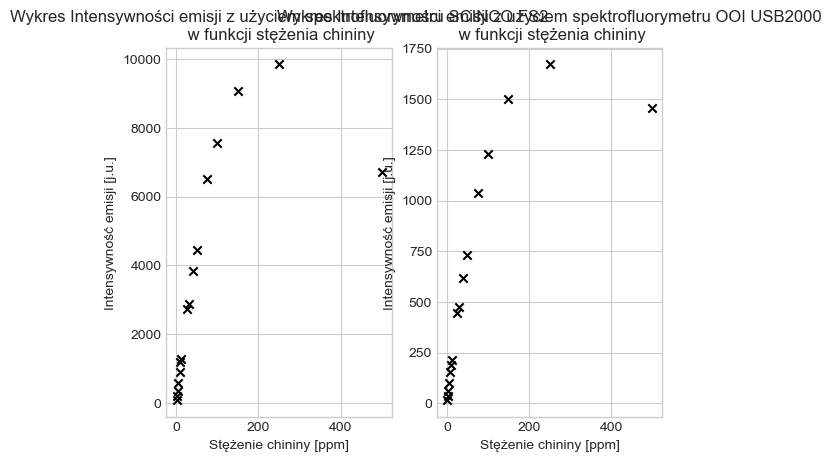

In [149]:
plt.subplot(1,2,1)
plt.scatter(C_kal,Z_kal, marker='x',color='k')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.title('Wykres Intensywności emisji z użyciem spektrofluorymetru SCINCO FS2\n w funkcji stężenia chininy')

plt.subplot(1,2,2)
plt.scatter(C_kal,P_kal, marker='x',color='k')
plt.xlabel("Stężenie chininy [ppm]")
plt.ylabel("Intensywność emisji [j.u.]")
plt.title('Wykres Intensywności emisji z użyciem spektrofluorymetru OOI USB2000\n w funkcji stężenia chininy')
